# Coding Applications in Medicine: Data Science - Categorical Hypothesis Tests

There are two basic hypothesis test to compare categorical variables, Fisher's exact test and Chi-square test. Recall that proportions are commonly used to compare categorical variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

import sklearn.datasets

In [2]:
# Load the insurance data.
insuranceDF = pd.read_csv("data/insurance.csv")
insuranceDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Fisher's Exact Test

The fisher's exact test is used to check for differences in proportions between categories. This test is mainly used for smaller sample size comparisons. 

In the following example, we will examine the differences in proportion of smokers based on male or female sex. A small sample size is simulated by only taking a look at the first 30 data points.

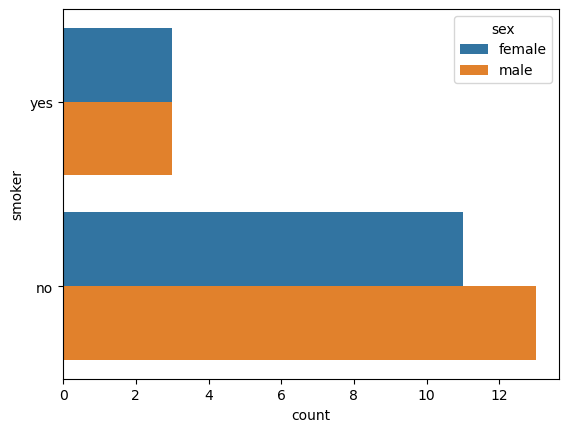

In [3]:
# Take first 30 data points.
insuranceDFSmallSampleDF = insuranceDF.head(30)

# Graph of the data.
sns.countplot(data=insuranceDFSmallSampleDF, y="smoker", hue="sex");
plt.show();

In [4]:
# Create the contingency table.
insuranceDFSmallSampleContingency = pd.crosstab(insuranceDFSmallSampleDF["smoker"], insuranceDFSmallSampleDF["sex"])
insuranceDFSmallSampleContingency

sex,female,male
smoker,,
no,11,13
yes,3,3


In [5]:
# Fisher Exact Test.
fisher_exact(insuranceDFSmallSampleContingency)

SignificanceResult(statistic=0.8461538461538461, pvalue=1.0)

## Chi-Squared Test 

The chi-squared test is used to check for differences in proportions between categories. This test is mainly used for larger sample size comparisons. 

In the following example, we will examine the differences in proportion of smokers based on parent status (0 children or at least 1 child). A large sample size is simulated by only taking a look at all the data points.

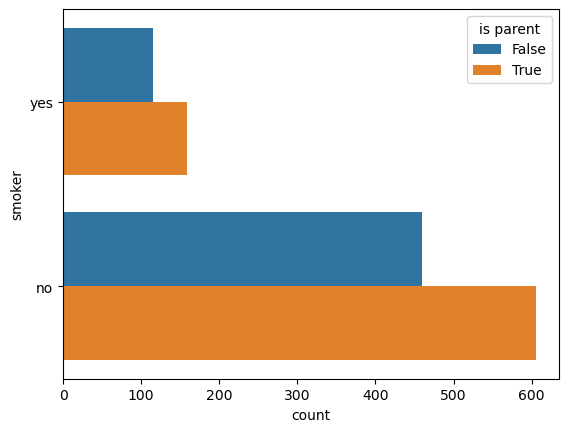

In [6]:
# Create column to determine whether the individual is a parent.
insuranceDF["is parent"] = (insuranceDF["children"] > 0)

# Graph of the data.
sns.countplot(data=insuranceDF, y="smoker", hue="is parent");
plt.show();

In [7]:
# Contigency table by count.
smokerParentContingency = pd.crosstab(insuranceDF["smoker"], insuranceDF["is parent"])
smokerParentContingency

is parent,False,True
smoker,,
no,459,605
yes,115,159


In [8]:
# Chi-squared analysis.
chi2_contingency(smokerParentContingency, correction=False)

Chi2ContingencyResult(statistic=0.12140818284389814, pvalue=0.7275121919359899, dof=1, expected_freq=array([[456.45440957, 607.54559043],
       [117.54559043, 156.45440957]]))

For more information, check the following:
- User Guide: https://docs.scipy.org/doc/scipy/tutorial/stats.html
- API Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

**Source:**


Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets